<a href="https://colab.research.google.com/github/Spermatoza-Classification/Sperm-morphology-classifer/blob/main/vgg16_transfer_learning_model_for_sperm_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sperm Morphology Image Classification Using VGG16 and Deep Learning  
This model is the initial implementation model to classify and predict Sri Lankan Sperm Morphology defects. This is a prototype model created by Nadun Nissanka.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations
from tensorflow.keras.models import Sequential # These are required for building our new model
from tensorflow.keras.layers import Dense # These are required for building our new model
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#First we will define our train and test image paths
train_files_path = "/content/drive/MyDrive/Prototypes/HuSHem/Train/"
test_files_path = "/content/drive/MyDrive/Prototypes/HuSHem/Test/"

#Load any image
img = load_img(test_files_path + "Amorphous/1 (9).BMP", target_size=(224,224), color_mode = "grayscale")

In [ ]:
print(img_to_array(img).shape)

(224, 224, 1)


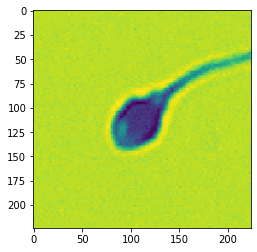

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
# Let's build our train and test datasets for Hu
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))

Found 176 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [ ]:
numberOfSpermTypes = 4

# Building The Model for Sperm Morphology Defect Classification  
We will use Transfer Learning, specially VGG16 model for our project!.. But VGG16 model has its own inputs both for training and test, therefore we should change the inputs..  
  
Original VGG16 model is designed for ImageNet dataset (which is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories) which has 1000 image categories which are not specifically aircraft images. This means we will build a new model for classificiation of aircraft images in our dataset and use VGG16 pre-trained layers in this new model.

In [ ]:
# Model Object
vgg = VGG16()

553476096/553467096 [==============================] - 9s 0us/step


In [30]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.engine.input_layer.InputLayer object at 0x7fcb52fbf210>, <keras.layers.convolutional.Conv2D object at 0x7fcb501e1c50>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e9804d0>, <keras.layers.pooling.MaxPooling2D object at 0x7fcb501d9810>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8ba490>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8ba590>, <keras.layers.pooling.MaxPooling2D object at 0x7fcb4e8c5110>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8ce6d0>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8d3cd0>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8c5950>, <keras.layers.pooling.MaxPooling2D object at 0x7fcb4e8da950>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8df850>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8da450>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8e02d0>, <keras.layers.pooling.MaxPooling2D object at 0x7fcb4e8f30d0>, <keras.layers.convolutional.Conv2D object at 0x7fcb4e8f0bd0>, <kera

In [31]:
# I'm gonna build a new Sequential model and I will add the all the layers from the Vgg16 model to my new model except 
# the last layer which is the output layer! Because I will build my own output layer according to my 
# input classes (which are the types of my military aircrafts)... 
# For this I define vggmodel_layersize_tobe_used = len(vgg_layers) - 1 (minus 1 means I omit the last layer - the output layer)
vggmodel_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [32]:
# Since I don't want to re-train all the original 16 layers of VGG16
# which has about 138 million (approx) parameters. VGG model has good train parameters, I will use them!!
for layers in model.layers:
    layers.trainable = False

# Since I have omitted the original output layer of VGG16, I have to add my new output layer to my new model!
model.add(Dense(numberOfSpermTypes, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [33]:
# After model design is complete, it's time to compile...
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [35]:
batch_size = 10 

hist = model.fit_generator(train_data,
                           steps_per_epoch=1000//batch_size,
                           epochs= 10, # You can increase epoch size if you have a computer with good specs...
                           validation_data=test_data,
                           validation_steps= 500//batch_size)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - 132s 1s/step - loss: 0.9075 - accuracy: 0.6648 - val_loss: 0.8298 - val_accuracy: 0.6750


# Test Sperm Morphology Defect Recognition Model.

In [37]:
img = Image.open("/content/drive/MyDrive/Prototypes/HuSHem/img/val.BMP").resize((224,224))

In [38]:
# We must convert it to array for operations...
img = np.array(img)

In [39]:
# Let's look it's shape..
img.shape

(224, 224, 3)

In [40]:
print(img.ndim)

3


In [41]:
# We have to add an extra dimension to our array so we will reshape it.. 
img = img.reshape(-1,224,224,3)   # with reshape(-1,..) I'm adding 1 extra dimension..
                                  # I do this because my model requires 4 dim array!

In [42]:
# Let's look it's shape..
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [43]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input
# VGG16 model requires it..
img = preprocess_input(img)   

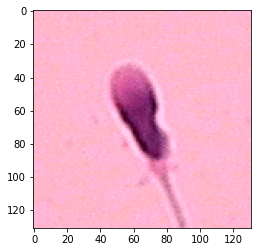

In [45]:
# Let's see the aircraft..
img_for_display = load_img("/content/drive/MyDrive/Prototypes/HuSHem/img/val.BMP")
plt.imshow(img_for_display)
plt.show()

# Lets Predict Using New Model

In [46]:
preds = model.predict(img)

In [47]:
# Let's see contents of prediction array.. 
preds

array([[0.00649946, 0.22088851, 0.7319304 , 0.04068168]], dtype=float32)

In [48]:
image_classes = ["Amorphous","Normal","Pyriform","Tapered"]
result = np.argmax(preds[0])
print(image_classes[result]) 

Pyriform
